In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt

In [2]:
(X_train , y_train),(X_test , y_test)   =  datasets.cifar10.load_data()


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train = y_train.reshape(-1,)

In [7]:
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
names[y_train[0]]

'frog'

In [9]:
def vis_plot(X,y , index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(names[y[index]])

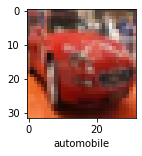

In [10]:
vis_plot(X_train, y_train , 5)

In [11]:
y_train[5]

1

In [12]:
np.argmax(X_train)

1488

In [13]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
X_train = X_train /255
X_test = X_test /255

In [15]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
from tensorflow import keras

In [50]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
ann.compile(optimizer = 'SGD'
             ,loss = 'sparse_categorical_crossentropy'
             ,metrics=['accuracy'])
ann.fit(X_train , y_train ,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9715 - accuracy: 0.2874
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7985 - accuracy: 0.3603
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7229 - accuracy: 0.3887
Epoch 4/5
1563/1563 [==============================] - 13s 9ms/step - loss: 1.6727 - accuracy: 0.4066 0s - los
Epoch 5/5
1563/1563 [==============================] - ETA: 0s - loss: 1.6339 - accuracy: 0.42 - 13s 8ms/step - loss: 1.6340 - accuracy: 0.4229


In [51]:
ann.evaluate(X_test , y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.6311 - accuracy: 0.4224


[1.6310662031173706, 0.42239999771118164]

In [53]:
y_pred = ann.predict(X_test)

In [54]:
y_classes_ann = [np.argmax(element) for element in y_pred]

In [55]:
y_classes_ann[:5]

[3, 9, 8, 0, 4]

In [57]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [58]:
print(classification_report(y_test , y_classes_ann))

              precision    recall  f1-score   support

           0       0.34      0.71      0.46      1000
           1       0.49      0.57      0.53      1000
           2       0.40      0.13      0.19      1000
           3       0.30      0.35      0.33      1000
           4       0.41      0.41      0.41      1000
           5       0.37      0.33      0.35      1000
           6       0.47      0.42      0.45      1000
           7       0.61      0.38      0.47      1000
           8       0.60      0.38      0.46      1000
           9       0.45      0.55      0.49      1000

    accuracy                           0.42     10000
   macro avg       0.44      0.42      0.41     10000
weighted avg       0.44      0.42      0.41     10000



In [59]:
cnn = keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation='relu',input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    #dense 
    keras.layers.Flatten(),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [60]:
cnn.compile(optimizer = 'SGD'
             ,loss = 'sparse_categorical_crossentropy'
             ,metrics=['accuracy'])
cnn.fit(X_train , y_train ,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 156s 100ms/step - loss: 2.0406 - accuracy: 0.2577
Epoch 2/5
1563/1563 [==============================] - 170s 108ms/step - loss: 1.6359 - accuracy: 0.4122
Epoch 3/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.4412 - accuracy: 0.4866
Epoch 4/5
1563/1563 [==============================] - 166s 107ms/step - loss: 1.3282 - accuracy: 0.5303
Epoch 5/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.2400 - accuracy: 0.5619


In [61]:
cnn.evaluate(X_test , y_test)

313/313 [==============================] - 12s 37ms/step - loss: 1.2436 - accuracy: 0.5591


[1.2436282634735107, 0.5590999722480774]

In [62]:
y_pred = cnn.predict(X_test)

In [63]:
y_classes = [np.argmax(element) for element in y_pred]

In [64]:
y_classes[:5]

[3, 8, 8, 0, 4]

In [65]:
names[2]

'bird'

In [66]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [67]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [68]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

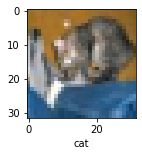

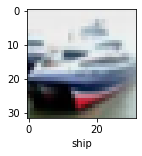

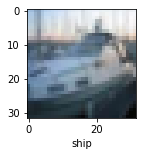

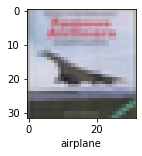

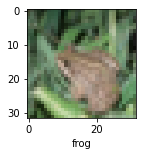

In [80]:
for i in range (0,5):
    vis_plot(X_test , y_test , i)

In [82]:
for i in range (0,5):
    print(names[y_classes[i]])

cat
ship
ship
airplane
deer


In [71]:
from sklearn.metrics import classification_report 
print(classification_report(y_test , y_classes))

              precision    recall  f1-score   support

           0       0.67      0.54      0.60      1000
           1       0.80      0.53      0.64      1000
           2       0.54      0.33      0.41      1000
           3       0.38      0.48      0.42      1000
           4       0.45      0.56      0.50      1000
           5       0.44      0.59      0.50      1000
           6       0.72      0.54      0.62      1000
           7       0.69      0.59      0.64      1000
           8       0.56      0.81      0.66      1000
           9       0.62      0.62      0.62      1000

    accuracy                           0.56     10000
   macro avg       0.59      0.56      0.56     10000
weighted avg       0.59      0.56      0.56     10000

